In [1]:
%cd ~/SSMuLA

/disk2/fli/SSMuLA


In [2]:
%load_ext autoreload
%autoreload 2
%load_ext blackcellmagic

In [3]:
import pandas as pd
import numpy as np

from tqdm import tqdm

import matplotlib.pyplot as plt

from SSMuLA.landscape_global import hamming

In [4]:
import numpy as np
from concurrent.futures import ProcessPoolExecutor, as_completed
from tqdm import tqdm

# Suppose the hamming function and df are defined elsewhere
# def hamming(str1, str2):
#     # Assuming a simple Hamming distance function for demonstration
#     return sum(c1 != c2 for c1, c2 in zip(str1, str2))

def process_aa(aa, all_aas, all_fitnesses):
    hm2_fits = []
    for aa2, fitness in zip(all_aas, all_fitnesses):
        if hamming(aa, aa2) > 2:
            continue
        hm2_fits.append(fitness)
    return aa, np.mean(hm2_fits), np.std(hm2_fits)

def main(csv_path):
    # Convert DataFrame columns to lists to avoid repeated data access overhead

    df = pd.read_csv(csv_path)
    all_aas = df["AAs"].tolist()
    all_fitnesses = df.loc[df["AAs"].isin(all_aas), "fitness"].tolist()

    hm2_dict = {}
    with ProcessPoolExecutor() as executor:
        futures = [executor.submit(process_aa, aa, all_aas, all_fitnesses) for aa in all_aas]
        for future in tqdm(as_completed(futures), total=len(futures)):
            aa, mean, std = future.result()
            hm2_dict[aa] = {'mean': mean, 'std': std}

    return hm2_dict

# Call main function with your DataFrame
# result_dict = main(df)


In [5]:
gb1_dict = main('data/GB1/scale2max/GB1.csv')

100%|██████████| 149361/149361 [30:18<00:00, 82.12it/s]


In [15]:
pd.DataFrame.from_dict(gb1_dict, orient='index')

,mean,std
ADGF,0.027890,0.066333
CDGC,0.037786,0.076738
DDYV,0.002945,0.013583
VDCV,0.022478,0.070514
CRGV,0.034233,0.073835
...,...,...
YYYR,0.006333,0.039915
YYYS,0.012146,0.052246
YYYT,0.016801,0.056238
YYYW,0.007673,0.042938


In [6]:
mean_df = pd.DataFrame.from_dict(gb1_dict, orient='index')

# Set the index name to 'aa'
mean_df.index.name = 'aa'
mean_df

,mean,std
aa,,
ADGF,0.027890,0.066333
CDGC,0.037786,0.076738
DDYV,0.002945,0.013583
VDCV,0.022478,0.070514
CRGV,0.034233,0.073835
...,...,...
YYYR,0.006333,0.039915
YYYS,0.012146,0.052246
YYYT,0.016801,0.056238


In [16]:
mean_df.to_csv('results/hd/GB1.csv')

In [8]:
import seaborn as sns

In [12]:
mean_df.loc['VDGV']["mean"]

0.035159396666492766

In [13]:
%matplotlib inline

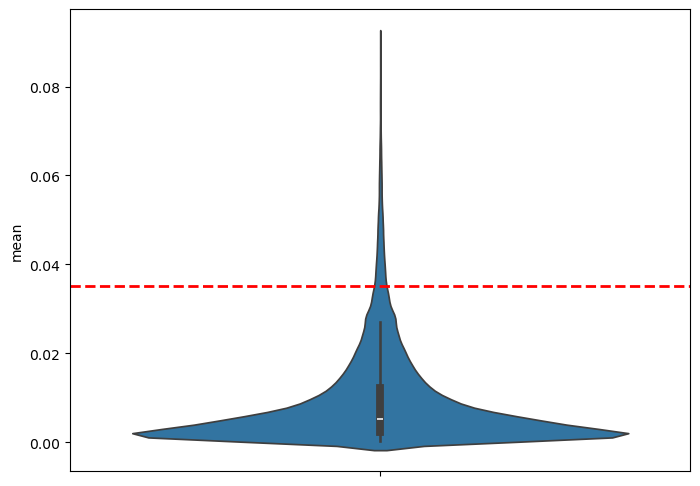

In [14]:
# Create the violin plot
plt.figure(figsize=(8, 6))  # Set the figure size
ax = sns.violinplot(mean_df["mean"])

# Add a horizontal line at the mean of the 'mean' column
# mean_value = mean_df["mean"].mean()
ax.axhline(mean_df.loc['VDGV']["mean"], color='r', linestyle='--', linewidth=2)

# Add annotations or labels (optional)
# ax.text(0.5, mean_value, f'Mean: {mean_value:.2f}', color='black', ha='left', va='center')

# Show the plot
plt.show()


<Axes: ylabel='mean'>

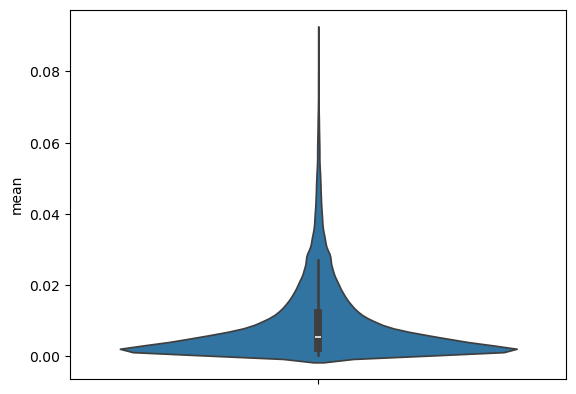

In [9]:
sns.violinplot(mean_df["mean"])
